<a href="https://colab.research.google.com/github/VaughnnIvan/ADVANCED-PREDICTIVE-ANALYTICS-/blob/main/FINAL_Project_ADVANCED_PREDICTIVE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/VaughnnIvan/ADVANCED-PREDICTIVE-ANALYTICS-/main/Bank%20Customer%20Churn%20Prediction.csv")

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [ ]:
# @title
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [ ]:
df = df.drop(columns=['gender'])
X = df.drop('country', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

,customer_id,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC()


In [ ]:
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
logistic_pred = logistic_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
svm_pred = svm_model.predict(X_test)


In [ ]:
logistic_accuracy = accuracy_score(y_test, logistic_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)


In [ ]:
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("SVM Accuracy:", svm_accuracy)


Logistic Regression Accuracy: 0.8035
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 0.8035


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [logistic_accuracy, decision_tree_accuracy, random_forest_accuracy, svm_accuracy]


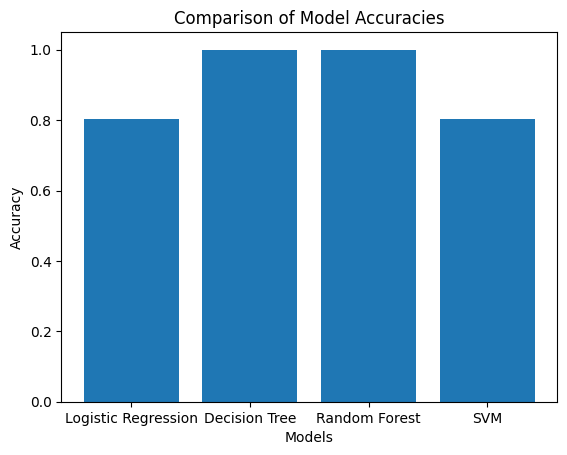

In [ ]:
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

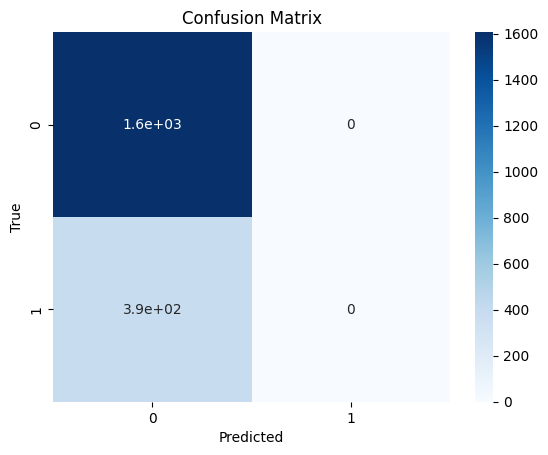

In [ ]:
conf_matrix = confusion_matrix(y_test, logistic_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()